# DIABETES PREDICTION SYSTEM

# 1.Business Understanding
## Introduction

* Our diabetes prediction system leverages advanced data analysis and machine learning techniques to diagnose diabetes based on key diagnostic measurements. This tool aims to provide accurate and timely predictions to support better healthcare outcomes.


# 1.1Problem Statement
*  Diabetes is a chronic condition that affects millions worldwide, often leading to severe health complications if not detected early. Despite the availability of diagnostic measurements, there is a need for an efficient and accurate system that can analyze these measurements and predict the likelihood of diabetes, aiding in timely intervention and management.

# 1.2 Objective
## 1.2.1 Study Objective
* The goal is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements..

## 1.2.2 Specific Objectives


* * To utilize machine learning algorithms for accurate prediction of diabetes outcomes based on patient diagnostic data.
* * To improve early detection and diagnosis of diabetes, enabling timely intervention and management for at-risk individuals.

# 2.0 Data Collection
## 2.1 Source of the data
* The data we are working with contains information from Pima Indians Diabetes Dataset

# 3.1 Data Understanding
### DataFrame


In [3]:
# Importing relevant libraries
# importing libraries
# !pip install graphviz

import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 3.1.2 Datahead

In [4]:
# Displaying the first 10 rows
df = pd.read_csv("C:/Users/HP/Downloads/gomycode/Machine Learning/class_project_8/class_project_8/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 3.1.3 Datatail

In [5]:
# DIsplaying the last 10 rows in the data set
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 3.1.3 DataShape
* Getting the shape of the dataset: Displaying the number of rows and columns

In [6]:
df.shape
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Our dataset has 768 rows and 9 columns


### 3.1.4 Data Information
* The information displayed is the number of null rows in every column,the data type of each element in the rows and the names of each column  in the dataset.

In [7]:
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* The dataset comprises 768 entries with no missing values across nine columns.
* The columns include various diagnostic measurements such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.


### 3.1.5 Data Details
* Getting the percentage of missing data in our dataset

In [8]:
# Geting the null values in the data
df.isnull().sum()/df.shape[0]*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

* No missing data in the dataset

### 3.1.7 Data Description
* Getting the mean , maximum , minimum  and standard deviation from the dataset

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 4.0 Data Cleaning
## 4.1 Dropping Duplicates in the data

In [10]:
# Geting the amount of duplicated items in the dataset
df.duplicated().sum()


0

In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* Ther are no duplicates in the dataset


# 4.2 Handling missing data 
* In the data we have values that are 0 and inthe dataset her are certain columns such as the Glucose, Blood Pressure, Skin Thickness, Insulin and BMI which cannot be Zero.

### 4.2.1 Replacing zero with NAN



In [12]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, pd.NA)


In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 4.2.2 Replacing  the NAN Values

In [14]:
# Fill NaN values with the median value of each column
df.fillna(df['Glucose'].mean(), inplace=True)
df.fillna(df['BloodPressure'].mean(), inplace=True)
df.fillna(df['SkinThickness'].median(), inplace=True)
df.fillna(df['Insulin'].median(), inplace=True)
df.fillna(df['BMI'].median(), inplace=True)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,121.686763,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,121.686763,26.6,0.351,31,0
2,8,183.0,64.0,121.686763,121.686763,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# 5.0 Data Understanding (EDA)

* The main aim of EDA in the dataset is to get an understanding of the Data, Gain insights into the dataset's structure, patterns, and relationships. This involves summarizing the main characteristics of the data, often with visual methods. 

In [15]:
# Making a coy of the dataframe
data = df.copy(deep=True)

In [16]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.149764,0.166385,0.021706,0.013652,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.148276,0.076063,0.418170,0.067678,0.137060,0.266534,0.492928
BloodPressure,0.149764,0.148276,1.000000,0.315516,0.003682,0.315109,-0.037777,0.216864,0.158650
SkinThickness,0.166385,0.076063,0.315516,1.000000,-0.095787,0.118657,-0.129947,0.242443,0.095358
Insulin,0.021706,0.418170,0.003682,-0.095787,1.000000,0.074833,0.129233,0.092706,0.202283
BMI,0.013652,0.067678,0.315109,0.118657,0.074833,1.000000,0.071631,-0.010105,0.134163
DiabetesPedigreeFunction,-0.033523,0.137060,-0.037777,-0.129947,0.129233,0.071631,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.216864,0.242443,0.092706,-0.010105,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.158650,0.095358,0.202283,0.134163,0.173844,0.238356,1.000000


### 5.1 Heatmap to display the correlation

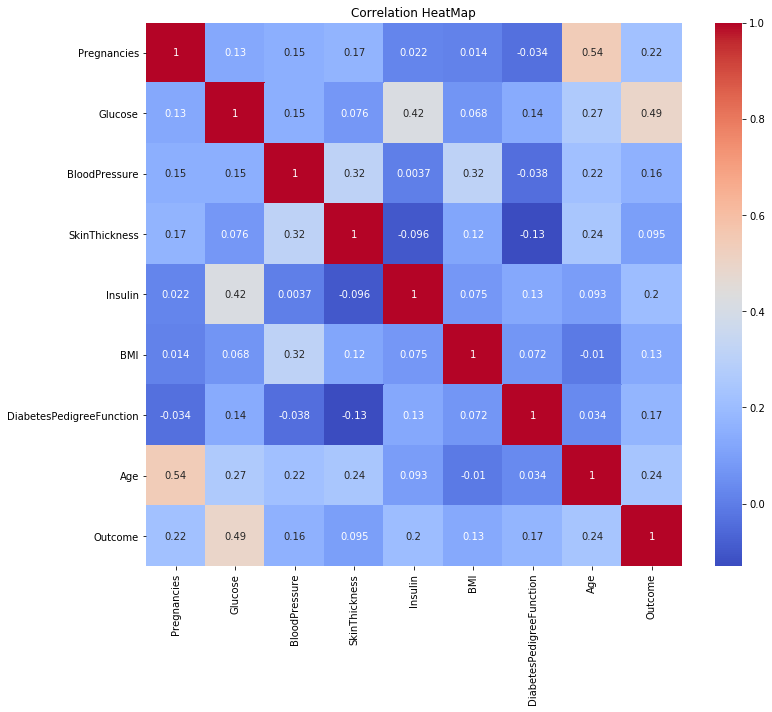

In [17]:
# Plot correlation heatmap with triane shape
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation HeatMap')
plt.show()

### 5.2 Identifing and removing Outliers column by column

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 5.2.2 Plotting Histogram for the whole Dataframe 

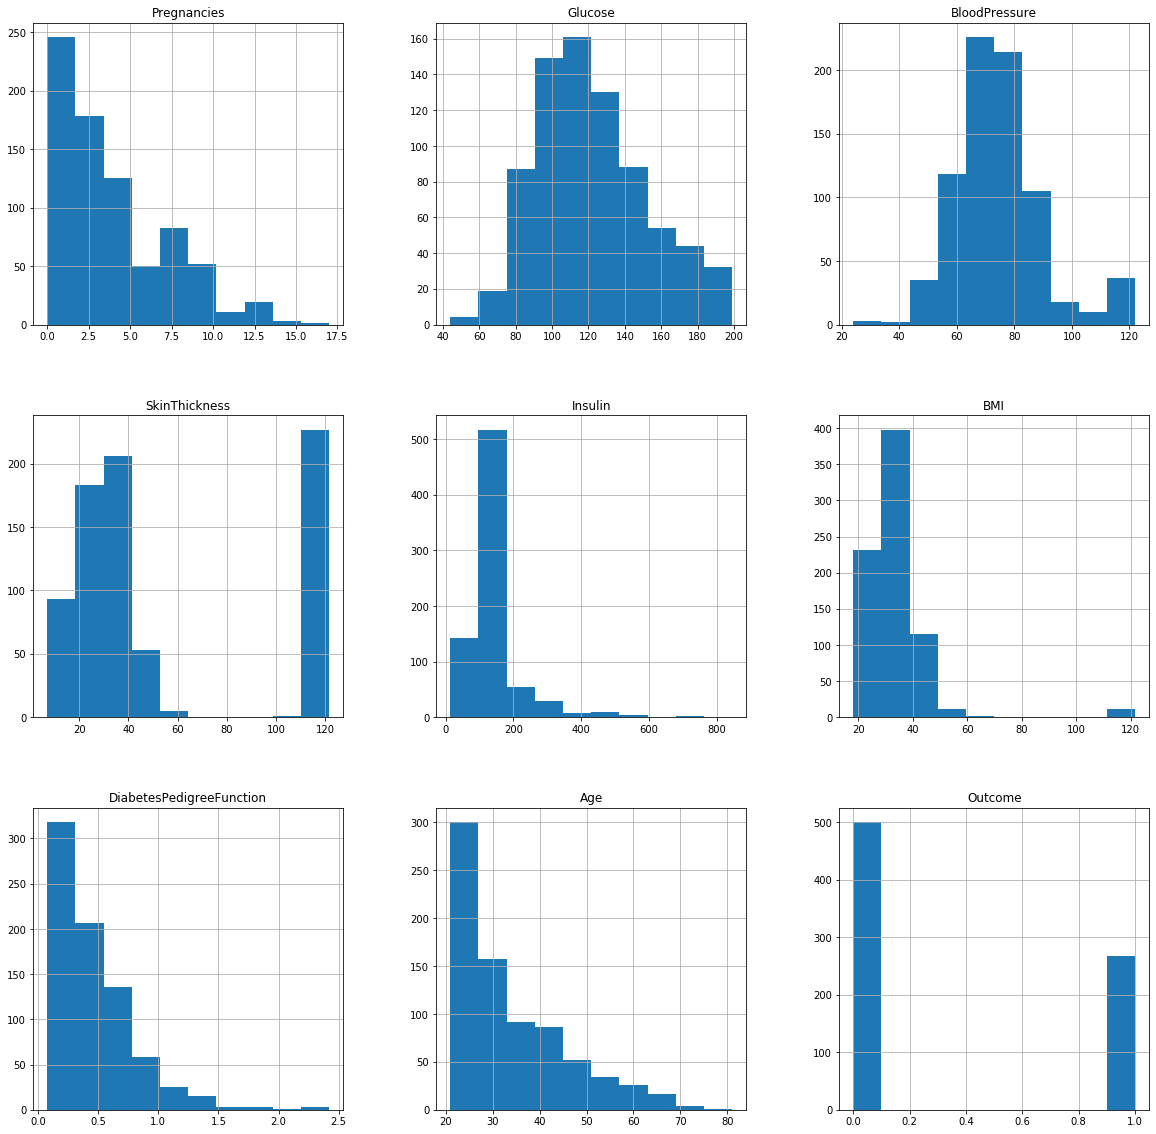

In [19]:

p = df.hist(figsize= (20,20))

### Function to display_boxplots for Pregnancies


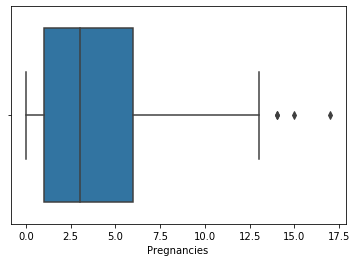

In [20]:

sns.boxplot(df['Pregnancies'])

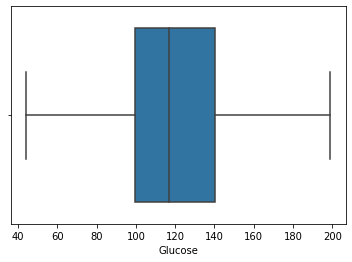

In [21]:
# Boxplot for Glucose column
sns.boxplot(df['Glucose']);

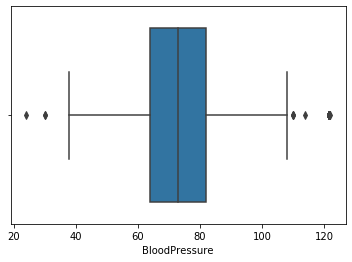

In [22]:
# Boxplot for BloodPressure column
sns.boxplot(df['BloodPressure'])

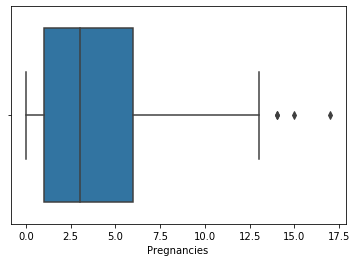

In [23]:
# Boxplot for Pregnancies column
sns.boxplot(df['Pregnancies']);

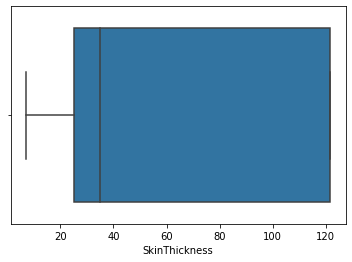

In [24]:
# Boxplot for SkinThinckness
sns.boxplot(df['SkinThickness']);

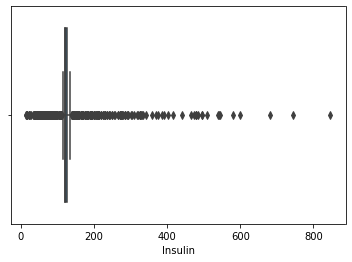

In [25]:
# Boxplot for insulin column
sns.boxplot(df['Insulin']);


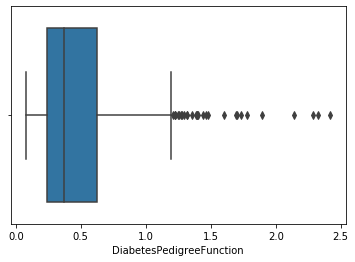

In [26]:
# Botplot for diabetesPedigreeFunction
sns.boxplot(df['DiabetesPedigreeFunction']);

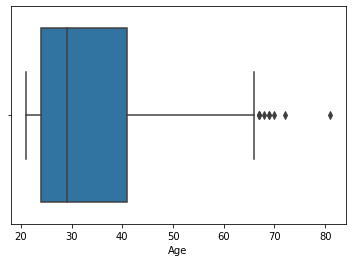

In [27]:
# Boxplot of AGE 
sns.boxplot(df['Age']);

## 5.3 Removing Outliers in the dataset

In [28]:
def remove_outliers(df, columns):
    """
    Remove outliers from a DataFrame based on IQR method.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of columns in which to remove outliers

    Returns:
    - DataFrame without outliers in specified columns
    """

    # Create a copy of the original DataFrame to avoid modifying it
    df_clean = df.copy()

    # Iterate over each column
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)

        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Calculate upper and lower bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean


In [29]:
# 5.2 Defining the columns to clean
columns_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Pregnancies','DiabetesPedigreeFunction','Age', 'Outcome'] 

In [30]:
df_cleaned =remove_outliers(df,columns_clean )
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,121.686763,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,121.686763,26.6,0.351,31,0
2,8,183.0,64.0,121.686763,121.686763,23.3,0.672,32,1
5,5,116.0,74.0,121.686763,121.686763,25.6,0.201,30,0
10,4,110.0,92.0,121.686763,121.686763,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,121.686763,121.686763,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,121.686763,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,121.686763,121.686763,30.1,0.349,47,1


In [31]:
#Comparing the length of the df_cleaned and the original df
print(f" Original dataframe: {len(df)}") 
print(f" Cleaned dataframe: {len(df_cleaned)}") 

 Original dataframe: 768
 Cleaned dataframe: 386


## 5.4 Displaing columns after removing outliers

In [32]:
def display_boxplots(df, columns):
    """
    Display box plots for specified columns in a DataFrame to identify outliers.

    Parameters:
    - df: DataFrame containing the data
    - columns: List of columns to plot box plots for

    Returns:
    - None
    """
    # Set up the matplotlib figure
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(2*num_cols, 5))

    # If only one column is provided, 'axes' is not a list but a single Axes object
    if num_cols == 1:
        axes = [axes]

    # Create box plots for each specified column
    for ax, col in zip(axes, columns):
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

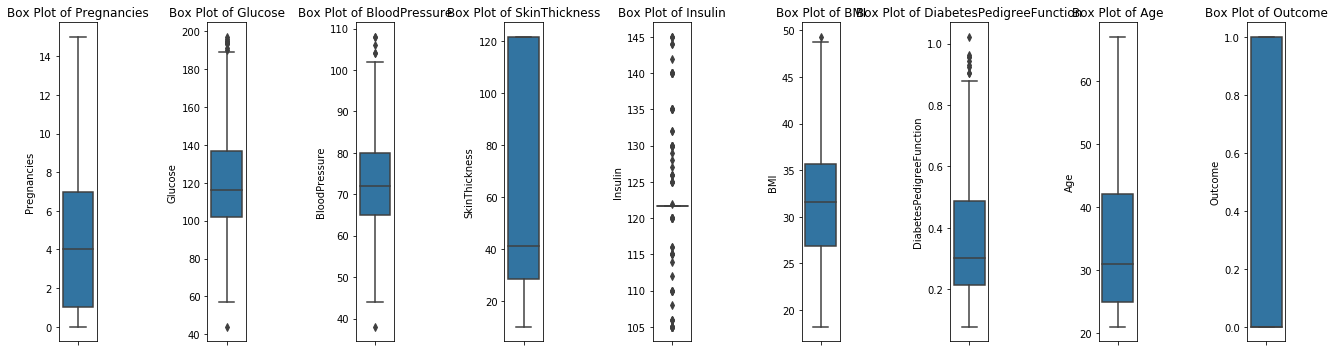

In [33]:
display_boxplots(df_cleaned,df.columns)

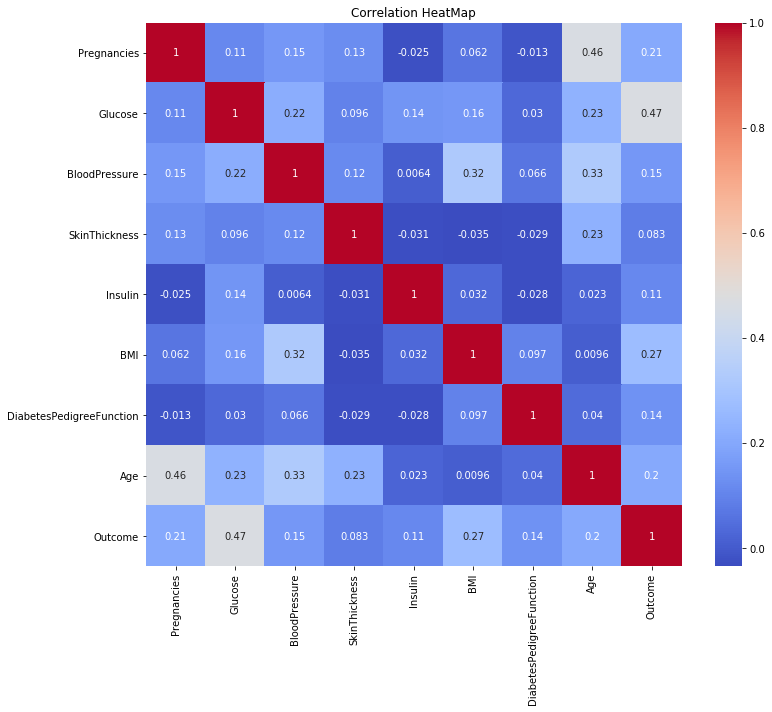

In [34]:
# Plot correlation heatmap with triane shape
plt.figure(figsize = (12,10))
sns.heatmap(df_cleaned.corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation HeatMap')
plt.show()

# 6.0 Modelling and Evaluation

## 6.1 Defining the X and y

In [35]:
target = 'Outcome'
X = df_cleaned.drop(target,axis=1)
y = df_cleaned[target]

In [36]:
X.shape

(386, 8)

In [37]:
y.shape

(386,)

## 6.2 Scaling and fiting and splitting 

In [38]:
# Initialize the scaler
scaler = StandardScaler()

# Scaling the variables

X_scaled = scaler.fit_transform(X) 

In [39]:
# splitting the data set into x test, x train, y test y train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

## Using the Ordinary Least Squares Regression 

In [40]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     20.08
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           2.77e-25
Time:                        10:27:09   Log-Likelihood:                -189.90
No. Observations:                 386   AIC:                             397.8
Df Residuals:                     377   BIC:                             433.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# 1st Model (Model)

In [41]:


# Creating the model
model  = LinearRegression()
model.fit(X_train,y_train)


# Print R2 and MSE for training and test sets
# # 3. Predict the target variable for both the training and test data
print(f" Score for Linear regresion training data {model.score(X_train,y_train)}" )
print(f" Score for Linear regresion testing data {model.score(X_test,y_test)}" )

print('*******************************************************')

# # Compute  MSE for the test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

# Printing MSE for the train data
print("Training Data Mean Squared Error (MSE): (MSE:", train_mse)

# Printing MSE for the test data
print("Testing Data Mean Squared Error(MSE):", test_mse)

print('*******************************************************')

# Printing mae for train and test data
print("Mean Absolute Error (MAE) - Train:", mae_train)
print("Mean Absolute Error (MAE) - Test:", mae_test)


 Score for Linear regresion training data 0.2621945740738737
 Score for Linear regresion testing data 0.3527607690078932
*******************************************************
Training Data Mean Squared Error (MSE): (MSE: 0.1582878228669308
Testing Data Mean Squared Error(MSE): 0.1591502119599264
*******************************************************
Mean Absolute Error (MAE) - Train: 0.3271087138103707
Mean Absolute Error (MAE) - Test: 0.33983787385277736


# 6.3   2nd Model ( Using columns with P value of above 0.005)
* Using columns with p value of less tha 0.005 which are Glucose, Insulin and BMI

In [42]:
# Locing colums with p value less tham 0.005
dfs = df_cleaned.loc[:,['Glucose','Insulin','BMI','Outcome']]
dfs.head(10)

,Glucose,Insulin,BMI,Outcome
0,148.0,121.686763,33.6,1
1,85.0,121.686763,26.6,0
2,183.0,121.686763,23.3,1
5,116.0,121.686763,25.6,0
10,110.0,121.686763,37.6,0
11,168.0,121.686763,38.0,1
17,107.0,121.686763,29.6,1
21,99.0,121.686763,35.4,0
22,196.0,121.686763,39.8,1
23,119.0,121.686763,29.0,1


## Defining X and Y

In [43]:
target = 'Outcome'
X = dfs.drop(target,axis=1)
y = dfs[target]

In [44]:
# Initialize the scaler
scaler = StandardScaler()

# Scaling the variables

X_scaled = scaler.fit_transform(X)

In [45]:
# splitting the data set into x test, x train, y test y train
X_train_X2, X_test_X2, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [46]:

# Creating the model
model  = LinearRegression()
model.fit(X_train,y_train)


# Print R2 and MSE for training and test sets
# # 3. Predict the target variable for both the training and test data
print(f" Score for Linear regresion training data {model.score(X_train,y_train)}" )
print(f" Score for Linear regresion testing data {model.score(X_test,y_test)}" )

print('*******************************************************')

# # Compute  MSE for the test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

# Printing MSE for the train data
print("Training Data Mean Squared Error (MSE): (MSE:", train_mse)

# Printing MSE for the test data
print("Testing Data Mean Squared Error(MSE):", test_mse)

print('*******************************************************')

# Printing mae for train and test data
print("Mean Absolute Error (MAE) - Train:", mae_train)
print("Mean Absolute Error (MAE) - Test:", mae_test)


 Score for Linear regresion training data 0.2621945740738737
 Score for Linear regresion testing data 0.3527607690078932
*******************************************************
Training Data Mean Squared Error (MSE): (MSE: 0.1582878228669308
Testing Data Mean Squared Error(MSE): 0.1591502119599264
*******************************************************
Mean Absolute Error (MAE) - Train: 0.3271087138103707
Mean Absolute Error (MAE) - Test: 0.33983787385277736


* The second model has performed worse than the first model after removing the columns

# Logistic Regression Model

In [47]:
# Fitting the logistic Regression model
Lo_model = LogisticRegression()


In [48]:
# Fitting the model
Lo_model.fit(X_train,y_train)

LogisticRegression()

In [49]:
# Make predictions
y_pred = Lo_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")


Accuracy: 0.717948717948718


In [50]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [51]:

# Creating the model
vanillamodel = LogisticRegression()
vanillamodel.fit(X_train,y_train)


# Print R2 and MSE for training and test sets
# # 3. Predict the target variable for both the training and test data
print(f" Score for Logistic regresion training data {vanillamodel.score(X_train,y_train)}" )
print(f" Score for Logistic regresion testing data {vanillamodel.score(X_test,y_test)}" )

print('*******************************************************')

# # Compute  MSE for the test data
y_train_pred = vanillamodel.predict(X_train)
y_test_pred = vanillamodel.predict(X_test)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

# Printing MSE for the train data
print("Training Data Mean Squared Error (MSE): (MSE:", train_mse)

# Printing MSE for the test data
print("Testing Data Mean Squared Error(MSE):", test_mse)

print('*******************************************************')

# Printing mae for train and test data
print("Mean Absolute Error (MAE) - Train:", mae_train)
print("Mean Absolute Error (MAE) - Test:", mae_test)


 Score for Logistic regresion training data 0.7662337662337663
 Score for Logistic regresion testing data 0.717948717948718
*******************************************************
Training Data Mean Squared Error (MSE): (MSE: 0.23376623376623376
Testing Data Mean Squared Error(MSE): 0.28205128205128205
*******************************************************
Mean Absolute Error (MAE) - Train: 0.23376623376623376
Mean Absolute Error (MAE) - Test: 0.28205128205128205


In [52]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[39,  5],
       [17, 17]], dtype=int64)

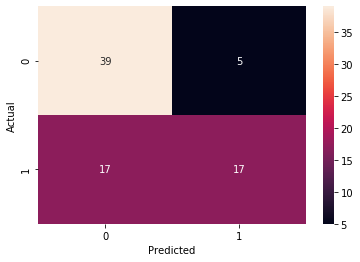

In [53]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True);

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        44
           1       0.77      0.50      0.61        34

    accuracy                           0.72        78
   macro avg       0.73      0.69      0.69        78
weighted avg       0.73      0.72      0.70        78



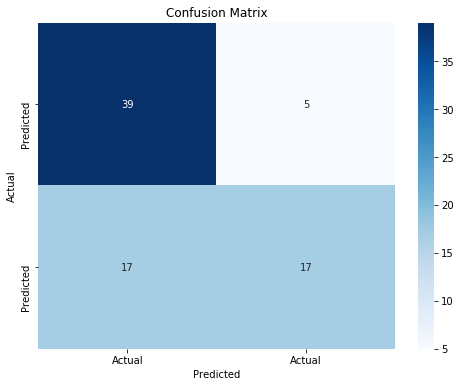

In [55]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Actual', 'Actual'], yticklabels=['Predicted', 'Predicted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
Recall = (cm[0,0])/(cm[0,0])+(cm[1,0])
Recall

18.0

In [57]:
precision = (cm[0,0])/(cm)

In [58]:
cm

array([[39,  5],
       [17, 17]], dtype=int64)

In [59]:
cm[1,0]

17

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.89      0.78        44
           1       0.77      0.50      0.61        34

    accuracy                           0.72        78
   macro avg       0.73      0.69      0.69        78
weighted avg       0.73      0.72      0.70        78



In [61]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc:.2f}')

ROC-AUC: 0.69


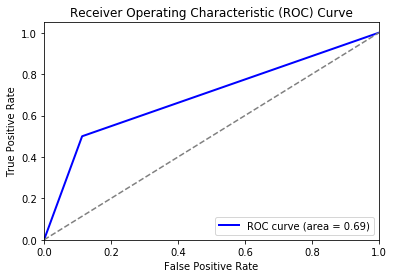

In [62]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## KNN Classcifier

In [63]:
import math
print(math.sqrt(len(y)))


19.6468827043885


In [64]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30) #split our data  

n_neighors = 30
scores = []

for k in range(1,30):
    knn = KNeighborsClassifier(n_neighors-k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),3))
    scores.append(round(accuracy_score(y_pred,y_test),3))

Accuracy for k= 1 is: 0.615
Accuracy for k= 2 is: 0.641
Accuracy for k= 3 is: 0.615
Accuracy for k= 4 is: 0.641
Accuracy for k= 5 is: 0.641
Accuracy for k= 6 is: 0.667
Accuracy for k= 7 is: 0.667
Accuracy for k= 8 is: 0.679
Accuracy for k= 9 is: 0.667
Accuracy for k= 10 is: 0.667
Accuracy for k= 11 is: 0.667
Accuracy for k= 12 is: 0.679
Accuracy for k= 13 is: 0.667
Accuracy for k= 14 is: 0.679
Accuracy for k= 15 is: 0.654
Accuracy for k= 16 is: 0.667
Accuracy for k= 17 is: 0.615
Accuracy for k= 18 is: 0.641
Accuracy for k= 19 is: 0.615
Accuracy for k= 20 is: 0.628
Accuracy for k= 21 is: 0.628
Accuracy for k= 22 is: 0.628
Accuracy for k= 23 is: 0.603
Accuracy for k= 24 is: 0.641
Accuracy for k= 25 is: 0.577
Accuracy for k= 26 is: 0.641
Accuracy for k= 27 is: 0.628
Accuracy for k= 28 is: 0.679
Accuracy for k= 29 is: 0.551


Text(0, 0.5, 'Testing Accuracy')

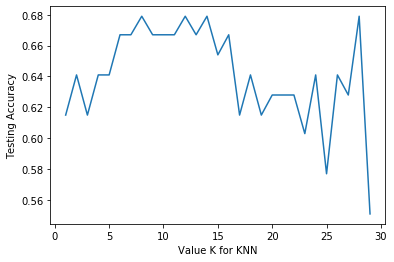

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

##  Iterating over the three distance metrics (Euclidean, Manhattan, and Minkowski) within the k-NN algorithm using a for loop. 

In [66]:
n_neighbors = 30
metrics = ['euclidean', 'manhattan', 'minkowski']
results = {}

for metric in metrics:
    scores = []
    for k in range(1, n_neighbors):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracy = round(accuracy_score(y_pred, y_test), 3)
        print(f'Accuracy for k={k} with {metric} metric is: {accuracy}')
        scores.append(accuracy)
    results[metric] = scores

# If you want to see the result dictionary
print(results)

Accuracy for k=1 with euclidean metric is: 0.551
Accuracy for k=2 with euclidean metric is: 0.679
Accuracy for k=3 with euclidean metric is: 0.628
Accuracy for k=4 with euclidean metric is: 0.641
Accuracy for k=5 with euclidean metric is: 0.577
Accuracy for k=6 with euclidean metric is: 0.641
Accuracy for k=7 with euclidean metric is: 0.603
Accuracy for k=8 with euclidean metric is: 0.628
Accuracy for k=9 with euclidean metric is: 0.628
Accuracy for k=10 with euclidean metric is: 0.628
Accuracy for k=11 with euclidean metric is: 0.615
Accuracy for k=12 with euclidean metric is: 0.641
Accuracy for k=13 with euclidean metric is: 0.615
Accuracy for k=14 with euclidean metric is: 0.667
Accuracy for k=15 with euclidean metric is: 0.654
Accuracy for k=16 with euclidean metric is: 0.679
Accuracy for k=17 with euclidean metric is: 0.667
Accuracy for k=18 with euclidean metric is: 0.679
Accuracy for k=19 with euclidean metric is: 0.667
Accuracy for k=20 with euclidean metric is: 0.667
Accuracy 

In [67]:
n_neighbors = 30
metrics = ['euclidean', 'manhattan', 'minkowski']
scores = []

for metric in metrics:
    for k in range(1, n_neighbors):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracy = round(accuracy_score(y_pred, y_test), 3)
        if accuracy > 0.66:
            print(f'Accuracy for k={k} with metric={metric} is: {accuracy}')
            scores.append((k, metric, accuracy))

# Optionally, print all the scores
print("Scores above 0.66:", scores)

Accuracy for k=2 with metric=euclidean is: 0.679
Accuracy for k=14 with metric=euclidean is: 0.667
Accuracy for k=16 with metric=euclidean is: 0.679
Accuracy for k=17 with metric=euclidean is: 0.667
Accuracy for k=18 with metric=euclidean is: 0.679
Accuracy for k=19 with metric=euclidean is: 0.667
Accuracy for k=20 with metric=euclidean is: 0.667
Accuracy for k=21 with metric=euclidean is: 0.667
Accuracy for k=22 with metric=euclidean is: 0.679
Accuracy for k=23 with metric=euclidean is: 0.667
Accuracy for k=24 with metric=euclidean is: 0.667
Accuracy for k=12 with metric=manhattan is: 0.679
Accuracy for k=16 with metric=manhattan is: 0.679
Accuracy for k=17 with metric=manhattan is: 0.679
Accuracy for k=18 with metric=manhattan is: 0.679
Accuracy for k=20 with metric=manhattan is: 0.692
Accuracy for k=24 with metric=manhattan is: 0.667
Accuracy for k=2 with metric=minkowski is: 0.679
Accuracy for k=14 with metric=minkowski is: 0.667
Accuracy for k=16 with metric=minkowski is: 0.679
Ac

# Using decision tree

In [68]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#splitting data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=10)
#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6025641025641025


# Perform Grid Search with Cross-Validation

In [69]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [70]:
# Define the grid search with cross-validation
grid_search = GridSearchCV(estimator=vanillamodel, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [71]:
RandomForestClassifier(n_estimators=50, max_depth=10,random_state=42)
RandomForestClassifier(n_estimators=50, max_depth=None,random_state=42)
RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)
RandomForestClassifier(n_estimators=100, max_depth=None,random_state=42)
    

NameError: name 'RandomForestClassifier' is not defined

In [72]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris



# Define models and smaller parameter grids
models_and_params = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10],
        }
    },
    'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1],
            'kernel': ['linear', 'rbf'],
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=10000),
        'params': {
            'C': [0.1, 1],
            'solver': ['liblinear', 'lbfgs'],
        }
    }
}

# Iterate over models
for model_name, model_info in models_and_params.items():
    print(f"Running GridSearchCV for {model_name}")
    grid_search = GridSearchCV(estimator=model_info['model'], param_grid=model_info['params'], cv=3, n_jobs=1, scoring='accuracy')
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Cross-Validation Score for {model_name}: {best_score:.2f}\n")
    
    # Evaluate the model using cross-validation
    cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=3, scoring='accuracy')
    
    print(f"Cross-Validation Scores for {model_name}: {cv_scores}")
    print(f"Mean Cross-Validation Score for {model_name}: {cv_scores.mean():.2f}\n")


Running GridSearchCV for RandomForest
Best Parameters for RandomForest: {'max_depth': 10, 'n_estimators': 50}
Best Cross-Validation Score for RandomForest: 0.73

Cross-Validation Scores for RandomForest: [0.73643411 0.74418605 0.71875   ]
Mean Cross-Validation Score for RandomForest: 0.73

Running GridSearchCV for SVC
Best Parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best Cross-Validation Score for SVC: 0.74

Cross-Validation Scores for SVC: [0.74418605 0.72093023 0.75      ]
Mean Cross-Validation Score for SVC: 0.74

Running GridSearchCV for LogisticRegression
Best Parameters for LogisticRegression: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross-Validation Score for LogisticRegression: 0.74

Cross-Validation Scores for LogisticRegression: [0.73643411 0.72868217 0.765625  ]
Mean Cross-Validation Score for LogisticRegression: 0.74



In [73]:
# Import required libraries
import graphviz
from sklearn.tree import export_graphviz

# Assuming 'classifier' is your trained decision tree classifier
dot_data = export_graphviz(classifier, out_file=None, 
                           feature_names=feature_names,  
                           class_names=target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Generate the graph from dot_data
graph = graphviz.Source(dot_data)

# Display the graph
graph


NameError: name 'classifier' is not defined

# Apriori Situation
* Let’s say you are a machine learning engineer working for a supermarket.
* Your objective is to explore data and extract the most valuable informations you can find.
* Your employer gave you a dataset that looks like this :

In [ ]:
# import mlxtend
# import pandas as pd
# from mlxtend.preprocessing import TransactionEncoder
# te=TransactionEncoder()
# te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
# df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
# df

## Support Code
* Let’s select itemsets with a minimum of 60% Support

In [1]:
# from mlxtend.frequent_patterns import apriori
# apriori(df, min_support=0.6)

# Support with column names

In [2]:
# frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
# frequ ent_itemsets

# Confidence Code
* In case we want to extract rules based on other metrics like confidence, we can use association_rules from mlxtend.frequent_patterns library.

In [3]:
# from mlxtend.frequent_patterns import association_rules 
# association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate items

# Lift code

In [ ]:
# from mlxtend.frequent_patterns import association_rules 
# association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)